# Market Research for Automated Cafe

In this project we will be presenting some market research using open-source data on restaurants in LA. The goal is to inform potential investors of characteristics which are predictive of success for an automated cafe.

## Download the data and prepare it for analysis

To begin, we will import the data, take an overview and prep it for analysis.

### IMPORT LIBRARIES & DATA

Let's import the needed libraries first.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

Now, we will import our /datasets/rest_data_us file.

In [2]:
try:
    rest_data = pd.read_csv('rest_data_us.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

### OVERVIEW

In [3]:
rest_data.info()
print()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB



,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Everything in visits looks great. There are (3) missing values in the "chains" column we will need to address. The data displays various establishments in LA. There is a unique ID for each establishment. Other information included is the establishment name, address, chain status, establishment type and number of seats.

### PREPROCESSING

Let's take a look at the missing values and decide how to handle them. We will also check for duplicates.

Let's look at the missing values using .isnull() along with .any().

In [4]:
rest_data[rest_data.isnull().any(axis=1)]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Are these (3) establishments chains or not? Let's see if they show up anywhere else in the data.

In [5]:
rest_data.loc[rest_data.loc[:,'object_name'] == 'TAQUERIA LOS 3 CARNALES']

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14


In [6]:
rest_data.loc[rest_data.loc[:,'object_name'] == "JAMMIN JIMMY'S PIZZA"]

,id,object_name,address,chain,object_type,number
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


In [7]:
rest_data.loc[rest_data.loc[:,'object_name'] == 'THE LEXINGTON THEATER']

,id,object_name,address,chain,object_type,number
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


The only show up once. This missing data must be random. We could research each of these restaurants to see if they're chains, but it is simpler to drop them from the data, since it is only (3) rows.

In [8]:
rest_data = rest_data.dropna()

Let's move on to duplicates. First, we will create a new variable as a copy of rest_data. We will then convert the address and name columns to lowercase before searching the dataset for duplicates.

In [9]:
#Convert to lower case
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


Now let's check for duplicates using .duplicated().

In [10]:
print(rest_data.duplicated().sum())

0


No duplicates found. Let's restore the columns to uppercase and move on to the data analysis.

In [11]:
#Convert to lower case
rest_data['object_name'] = rest_data['object_name'].str.upper()
rest_data['address'] = rest_data['address'].str.upper()
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


## Data analysis

### Investigate Proportions of Establishment Types

Let's calculate the proportion of establishment types and plot a graph showing the various proportions. First, we will calculate the total number of establishments.

In [12]:
total_establishments = len(rest_data)
total_establishments

9648

Now, let's see what the various establishment types are.

In [13]:
rest_data['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

There are (6) types. Let's calculate how many there are of each.

In [14]:
total_cafes = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Cafe'])
total_restaurants = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Restaurant'])
total_fast_food = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Fast Food'])
total_bakeries = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Bakery'])
total_bars = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Bar'])
total_pizzerias = len(rest_data.loc[rest_data.loc[:,'object_type'] == 'Pizza'])

In [15]:
print('total_cafes: ', total_cafes)
print('total_restaurants: ', total_restaurants)
print('total_fast_food: ', total_fast_food)
print('total_bakeries: ', total_bakeries)
print('total_bars: ', total_bars)
print('total_pizzerias: ', total_pizzerias)

total_cafes:  435
total_restaurants:  7253
total_fast_food:  1066
total_bakeries:  283
total_bars:  292
total_pizzerias:  319


Now, let's calculate the proportions of each of them, dividing each by the total number of establishments.

In [16]:
cafe_proportion = total_cafes / total_establishments
restaurant_proportion = total_restaurants / total_establishments
fast_food_proportion = total_fast_food / total_establishments
bakery_proportion = total_bakeries / total_establishments
bar_proportion = total_bars / total_establishments
pizza_proportion = total_pizzerias / total_establishments

Now, let's store the results in the variable: proportions_data.

In [17]:
proportions_data = [cafe_proportion, restaurant_proportion, fast_food_proportion, bakery_proportion, bar_proportion,
                    pizza_proportion]
proportions_data

[0.04508706467661692,
 0.751762023217247,
 0.11048922056384743,
 0.02933250414593698,
 0.030265339966832505,
 0.03306384742951907]

Now, let's plot a pie chart showing the proportions.

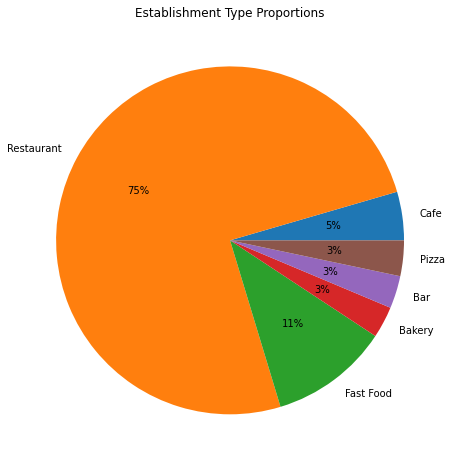

In [18]:
plt.figure(figsize=(16, 8))
plt.pie(proportions_data, labels=['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'], autopct='%.0f%%')
plt.title('Establishment Type Proportions')
plt.show()

Around 75% of the establishments are restaurants. There are a significant amount of Fast Food establishments (over 10%), but not nearly as many as restaurants. The remaining types run around 5% each.

### Investigate Proportions of Chain Status

Let's calculate the proportion of establishments by chain status and plot a graph showing the various proportions. This will be easier. Let's declare variables for total establishments by chain status.

In [19]:
total_chains = len(rest_data.loc[rest_data.loc[:,'chain'] == True])
total_non_chains = len(rest_data.loc[rest_data.loc[:,'chain'] == False])
print('total_chains: ', total_chains)
print('total_non_chains: ', total_non_chains)

total_chains:  3676
total_non_chains:  5972


Now, let's calculate proportions as we did before.

In [20]:
chain_proportion = total_chains / total_establishments
non_chain_proportion = total_non_chains / total_establishments

In [21]:
chain_proportion

0.38101160862354894

In [22]:
non_chain_proportion

0.6189883913764511

Now, let's plot the graph.

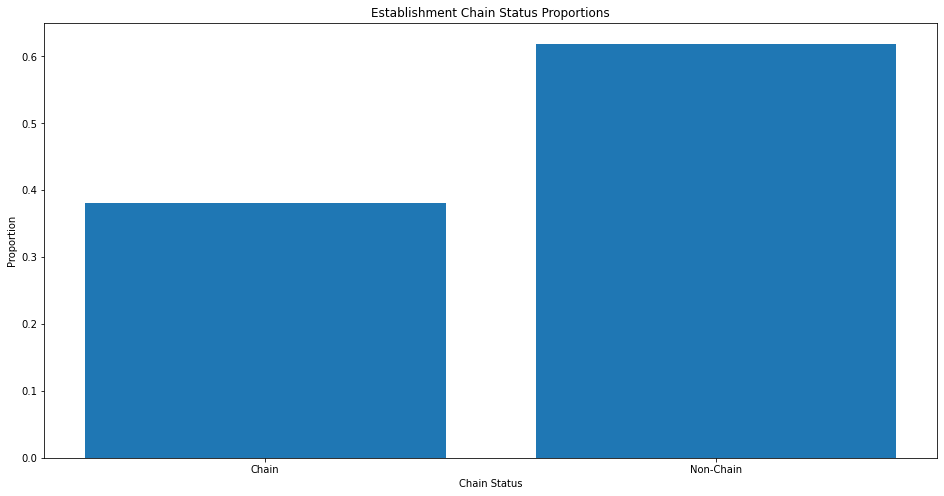

In [23]:
plt.figure(figsize=(16, 8), )
plt.bar(['Chain', 'Non-Chain'], [chain_proportion, non_chain_proportion])
plt.title('Establishment Chain Status Proportions')
plt.ylabel('Proportion')
plt.xlabel('Chain Status')
plt.show()

There are about one and a half non-chain establishments for every chain establishment.

### Investigate Proportions of Establishment type for Chains

Let's calculate the proportion of establishment types for chain establishments as we did above for all establishments. First, we will declare a variable for the slice of all chain establishments.

In [24]:
chain_establishments = rest_data.loc[rest_data.loc[:,'chain'] == True]

There are (6) types of establishments. Let's calculate how many there are of each in our new chain_establishments dataset.

In [25]:
total_chain_cafes = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Cafe'])
total_chain_restaurants = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Restaurant'])
total_chain_fast_food = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Fast Food'])
total_chain_bakeries = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Bakery'])
total_chain_bars = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Bar'])
total_chain_pizzerias = len(chain_establishments.loc[chain_establishments.loc[:,'object_type'] == 'Pizza'])

In [26]:
print('total_chain_cafes: ', total_chain_cafes)
print('total_chain_restaurants: ', total_chain_restaurants)
print('total_chain_fast_food: ', total_chain_fast_food)
print('total_chain_bakeries: ', total_chain_bakeries)
print('total_chain_bars: ', total_chain_bars)
print('total_chain_pizzerias: ', total_chain_pizzerias)

total_chain_cafes:  266
total_chain_restaurants:  2292
total_chain_fast_food:  605
total_chain_bakeries:  283
total_chain_bars:  77
total_chain_pizzerias:  153


Now, let's calculate the proportions of each of them, dividing each by the total number of chain establishments declared to our total_chains variable above.

In [27]:
chain_cafe_proportion = total_chain_cafes / total_chains
chain_restaurant_proportion = total_chain_restaurants / total_chains
chain_fast_food_proportion = total_fast_food / total_chains
chain_bakery_proportion = total_chain_bakeries / total_chains
chain_bar_proportion = total_chain_bars / total_chains
chain_pizza_proportion = total_chain_pizzerias / total_chains

Now, let's store the results in the variable: chain_proportions_data.

In [28]:
chain_proportions_data = [chain_cafe_proportion, chain_restaurant_proportion, chain_fast_food_proportion,
                          chain_bakery_proportion, chain_bar_proportion, chain_pizza_proportion]
chain_proportions_data

[0.07236126224156691,
 0.6235038084874864,
 0.28998911860718174,
 0.07698585418933623,
 0.020946681175190423,
 0.041621327529923834]

Now, let's plot a bar graph showing the proportions for chains alongside our previously saved proportions_data results.

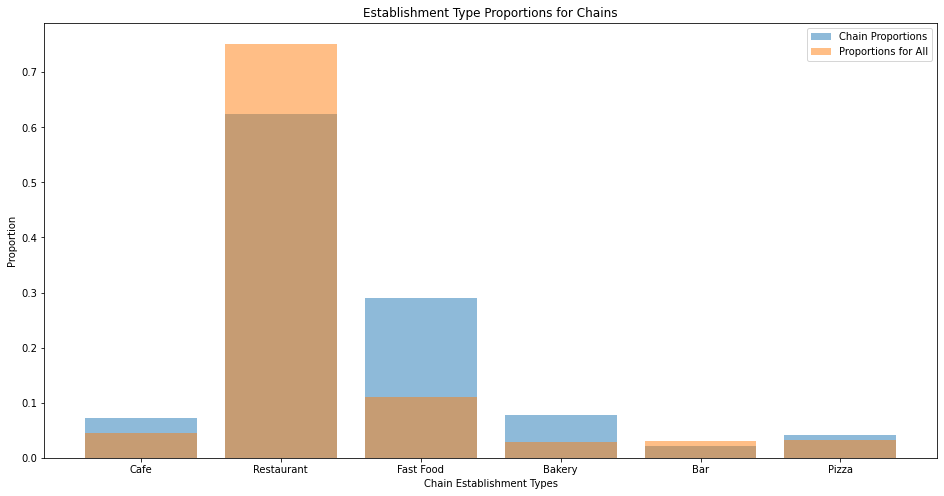

In [29]:
plt.figure(figsize=(16, 8))
plt.bar(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'], chain_proportions_data, alpha=0.5)
plt.bar(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'], proportions_data, alpha=0.5)
plt.title('Establishment Type Proportions for Chains')
plt.ylabel('Proportion')
plt.xlabel('Chain Establishment Types')
plt.legend(labels=['Chain Proportions', 'Proportions for All'])
plt.show()

These numbers differ significantly from the proportions which included non-chain establishments. Here, we see that the Restaurant type has lowered to a little of 60%. Fast Food has risen to almost 30%. The rest of the establishment types are within the 10% range. Very few Bars are chains. The type of establishment which is typically a chain is clearly Fast Food.

### Investigate Chain Location Quantity and Seating Capacity

We would like to understand more about the nature of chain establishments in relation to the number of locations and their seating capacity. Let's use seaborn to make a scatterplot showing the number of locations per chain and the average number of seats per chain. To do this, we will first create a new table, grouping by chain (object_name) and using .agg() to find the number of locations in each chain (id) and the average number of seats (number) per chain. We will also identify the establishment type by applying "first".

In [30]:
chain_seating = chain_establishments.groupby('object_name').agg({'id': 'count', 'number': 'mean',
                                                                 'object_type': 'first'})
chain_seating.head()

,id,number,object_type
object_name,,,
#1 CHINESE FAST FOOD,1,6.0,Restaurant
1810 RESTAURANT,1,45.0,Restaurant
333,1,180.0,Restaurant
3RD ST MARKET & DELI,1,7.0,Restaurant
4 CAMINOS RESTAURANT,1,18.0,Restaurant


Now let's plot the scatter chart using seaborn. We will choose object_type for hue to see what differences may be.

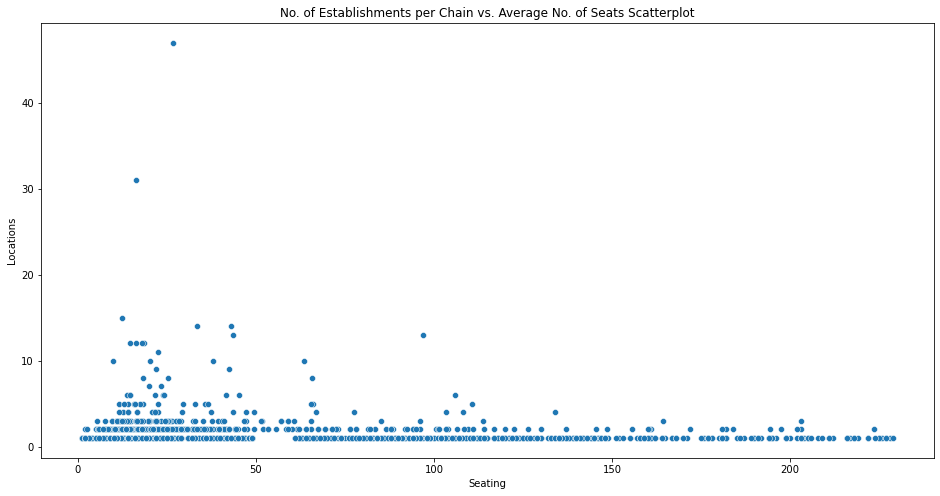

In [31]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=chain_seating['number'], y=chain_seating['id'])
plt.title('No. of Establishments per Chain vs. Average No. of Seats Scatterplot')
plt.ylabel('Locations')
plt.xlabel('Seating')
plt.show()

From this chart, we can conclude that most chains only have one or two locations. They can range from only a few seats to over (200). The few chains that have more locations than one or two tend to have smaller seating capacities. As such, we will characterize chains as typically having one or two locations with a wide range of seating capacity. We should keep in mind that this chart is not entirely accurate. Many of the "object_name" values include a wide range of identifiers that prevent them from being properly grouped with the appropriate chain. Cleaning these extra identifiers out would be no easy task. Let's remove all establishment types other than cafes and fast food to get a clearer picture. Our reasoning here is that automated cafes will most likely resemble chain cafes and chain fast food restaurants. This is due to the high initial development costs, low quantity of menu items due to the constraints of atomization, and the low overhead.

In [32]:
#Slice for Cafe only
cafe_fast_food_chain_seating = chain_seating.loc[(chain_seating.loc[:,'object_type'] == 'Cafe') |
                                       (chain_seating.loc[:,'object_type'] == 'Fast Food')]
cafe_fast_food_chain_seating.head()

,id,number,object_type
object_name,,,
AA CHINESE EXPRESS FAST FOOD,1,15.0,Fast Food
ABC DONUTS,2,11.0,Fast Food
ABC EXPRESS CHINESE FOOD,1,15.0,Fast Food
ALANA'S COFFEE ROASTING,1,12.0,Cafe
ANDANTE COFFEE ROASTERS,1,4.0,Cafe


Now, let's plot a scatter chart for location quantity and seating capacity for chain cafes and fast food restaurants.

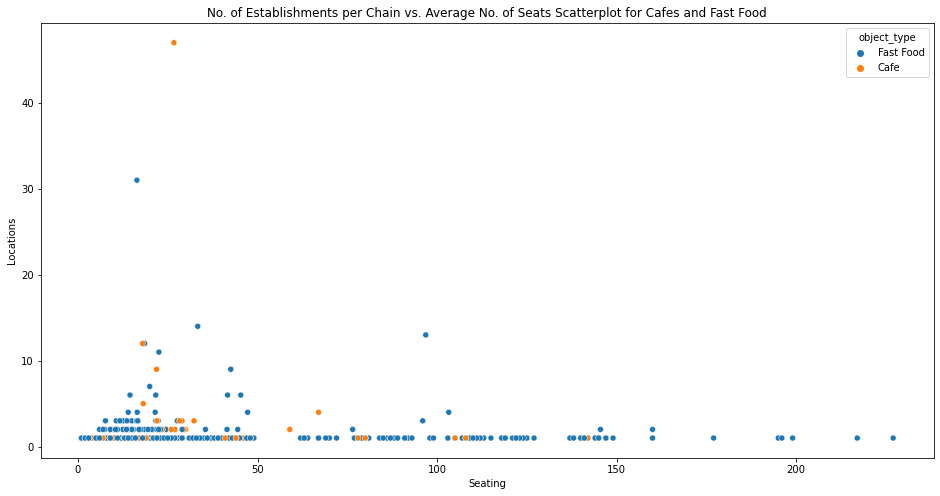

In [33]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=cafe_fast_food_chain_seating['number'], y=cafe_fast_food_chain_seating['id'],
                hue=cafe_fast_food_chain_seating['object_type'])
plt.title('No. of Establishments per Chain vs. Average No. of Seats Scatterplot for Cafes and Fast Food')
plt.ylabel('Locations')
plt.xlabel('Seating')
plt.show()

Now it's a little easier to see the trends. Most chain cafes/fast food restaurants have a single location, maybe two, in LA. The seating capacity tends to fall within (50) seats. There is a lot of information on chain cafes/fast food restaurants with more than (2) locations to make a judgement about what their typical seating capacity is. Most of them also seem to fall within (50) seats.

### Investigate Seating Capacity per Establishment type.

Let's create a bar graph showing the average number of seats per establishment type. To do this, we will .groupy() obect_type and use .agg()to find the average number of seats (number). We will reset the index so that we can later plot a graph based on both columns.

In [34]:
seating_per_type = rest_data.groupby('object_type').agg({'number': 'mean'}).reset_index()
seating_per_type

,object_type,number
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.545455
5,Restaurant,48.048807


Now, let's plot a bar graph useing seaborn.

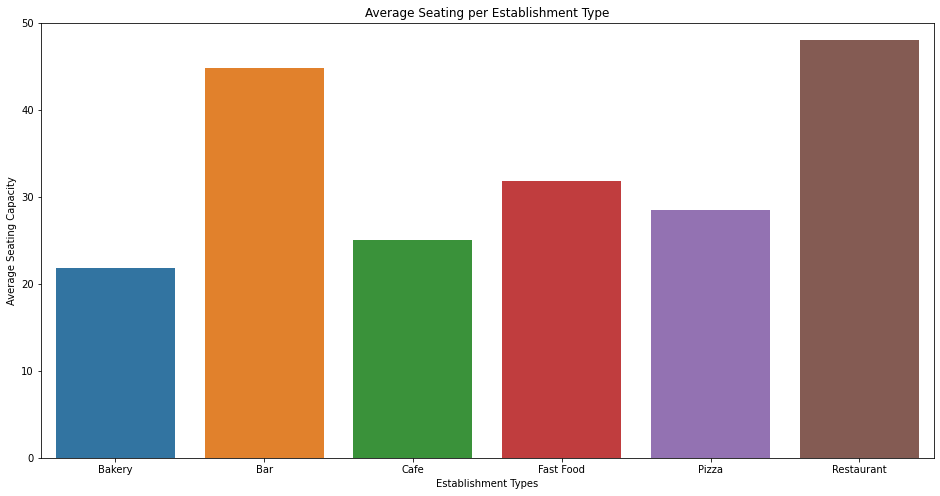

In [35]:
plt.figure(figsize=(16, 8))
sns.barplot(x='object_type', y='number', data=seating_per_type)
plt.title('Average Seating per Establishment Type')
plt.ylabel('Average Seating Capacity')
plt.xlabel('Establishment Types')
plt.ylim([0, 50])
plt.show()

Restaurants tend to have the greatest seating capacity. Bars are a close second. Let's take a look at seating capacity for chains only. First, let's calculate mean seating based on our previously declared chain_establishments variable.

In [36]:
chain_seating_per_type = chain_establishments.groupby('object_type').agg({'number': 'mean'}).reset_index()
chain_seating_per_type

,object_type,number
0,Bakery,21.773852
1,Bar,40.259740
2,Cafe,25.917293
3,Fast Food,38.089256
4,Pizza,25.529412
5,Restaurant,44.856021


Now, let's plot the bar chart. We will set the range to 50 average seating capacity for ease of comparison with previous graph.

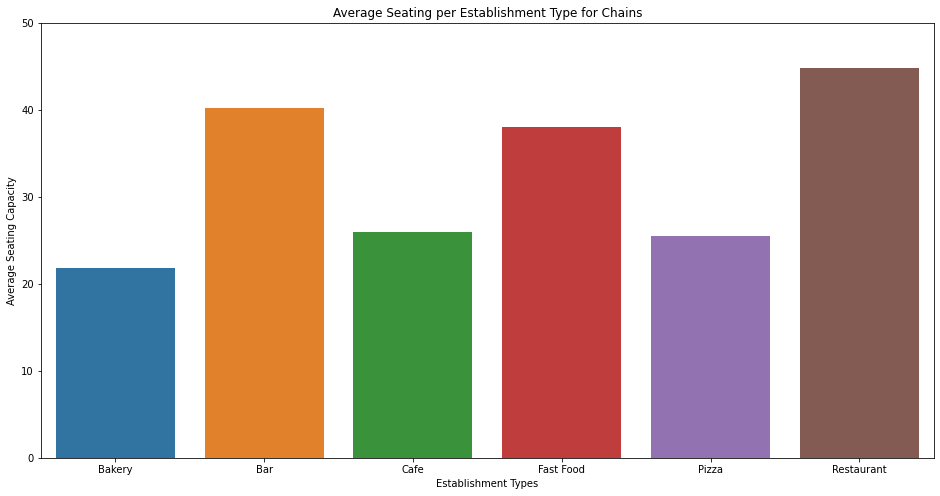

In [37]:
plt.figure(figsize=(16, 8))
sns.barplot(x='object_type', y='number', data=chain_seating_per_type)
plt.title('Average Seating per Establishment Type for Chains')
plt.ylabel('Average Seating Capacity')
plt.xlabel('Establishment Types')
plt.ylim([0, 50])
plt.show()

There is a slight increase in seating capacity for chain cafes and a significant increase for fast food chains.

### Create Street Name Column

We will now create a new column to store the street names for each establishment. We will use the data from the "address" column, and clean out everything but the street names using regular expressions. First, let's create a copy of the "address" column named "street_name".

In [38]:
rest_data['street_name'] = rest_data['address']

Now let's run the regular expressions, replacing all undesired instances with nothing, ''.

In [39]:
#Remove the beginning numbers along with the following space
rest_data['street_name'] = rest_data['street_name'].str.replace('^\d+ ', '')

In [40]:
#Remove all instances of a space followed by "#" and whatever comes after
rest_data['street_name'] = rest_data['street_name'].str.replace(' #.+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' # .+', '')

In [41]:
#Remove all instances of a space followed by "STE" and whatever comes after
rest_data['street_name'] = rest_data['street_name'].str.replace(' STE.+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' STE .+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' STE', '')

In [42]:
#Remove all instances of a space followed by "UNIT" and whatever comes after
rest_data['street_name'] = rest_data['street_name'].str.replace(' UNIT.+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' UNIT .+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' UNIT', '')

In [43]:
#Remove all instances of a space followed by "LVL" and whatever comes after
rest_data['street_name'] = rest_data['street_name'].str.replace(' LVL.+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' LVL .+', '')
rest_data['street_name'] = rest_data['street_name'].str.replace(' LVL', '')

In [44]:
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


We can see the cleaned "street_name" column on the right here. There may be a few that are not completely rid of unwanted address identifiers. However, this should catch the majority.

### Top Ten Streets

Let's find the streets with the most establishments and plot a graph showing the results. We will group by street and select the top ten in descending order.

In [45]:
top_ten_streets = rest_data.groupby('street_name').agg({'id' : 'count'}).sort_values('id', ascending=False).head(10).reset_index()
top_ten_streets

,street_name,id
0,WILSHIRE BLVD,371
1,W SUNSET BLVD,360
2,W PICO BLVD,338
3,S WESTERN AVE,263
4,SANTA MONICA BLVD,257
5,HOLLYWOOD BLVD,239
6,W OLYMPIC BLVD,227
7,S FIGUEROA ST,220
8,W 3RD ST,217
9,W 6TH ST,209


Now, let's plot a bar graph showing the results.

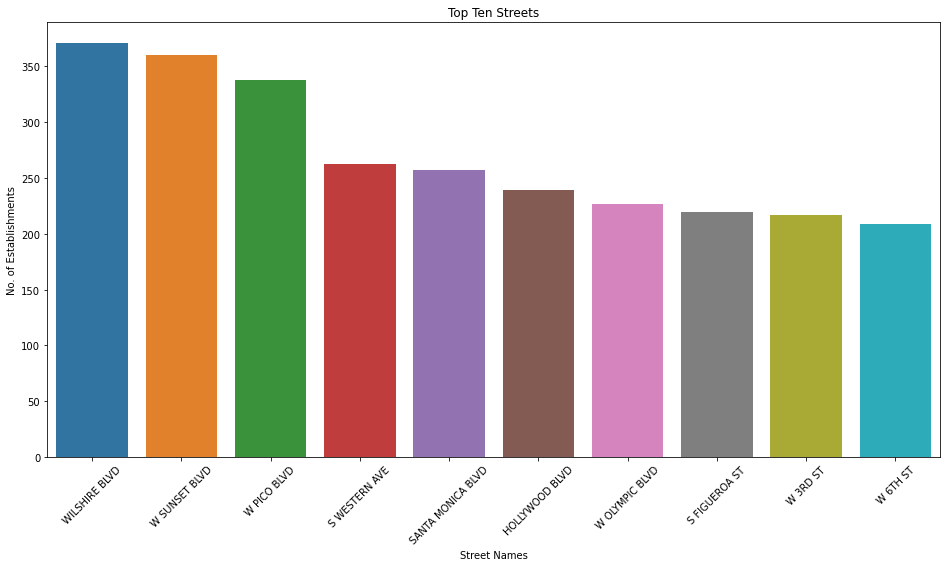

In [46]:
plt.figure(figsize=(16, 8))
sns.barplot(x='street_name', y='id', data=top_ten_streets)
plt.title('Top Ten Streets')
plt.ylabel('No. of Establishments')
plt.xlabel('Street Names')
plt.xticks(rotation = 45)
plt.show()

The top ten streets have anywhere between (200) and (400) establishments. Wilshire Blvd has the most at around (375).

### Single Establishment Streets

Let's find the number of streets that only have one establishment. We will group by street name as before.

In [47]:
single_streets = rest_data.groupby('street_name').agg({'id' : 'count'}).sort_values('id')
single_streets.head()

,id
street_name,
1/2 3RD ST,1
S BROADWAY ST 101E1,1
S BROADWAY ST E3,1
S BROADWAY ST F9- F10,1
S BROXTON AVE,1


Now, let's make a slice of the streets with on establishment (id count).

In [48]:
single_streets = single_streets.loc[single_streets.loc[:,'id'] == 1]
print('Number of streets with only one establishment: ', len(single_streets))
single_streets.head()

Number of streets with only one establishment:  578


,id
street_name,
1/2 3RD ST,1
S BROADWAY ST 101E1,1
S BROADWAY ST E3,1
S BROADWAY ST F9- F10,1
S BROXTON AVE,1


There are (591) streets which have only one establishment. Let's look at a histogram as well to get an idea of how establishment quantities are distributed among various streets. First, we will make a groupby() list again to count the number of establishments per street.

In [49]:
seating_distribution = rest_data.groupby('street_name').agg({'id' : 'count'}).sort_values('id').reset_index()
seating_distribution.head()

,street_name,id
0,1/2 3RD ST,1
1,S BROADWAY ST 101E1,1
2,S BROADWAY ST E3,1
3,S BROADWAY ST F9- F10,1
4,S BROXTON AVE,1


Now we can plot the histogram.

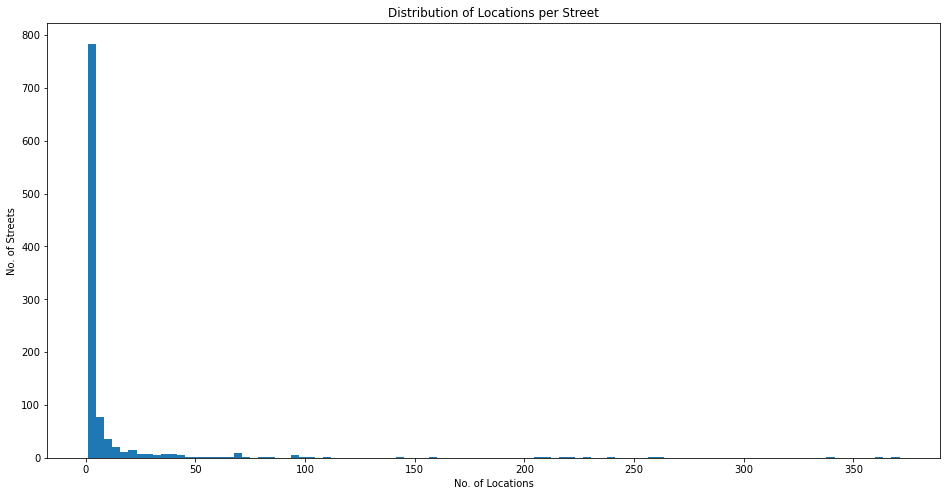

In [50]:
plt.figure(figsize=(16, 8))
plt.hist(data=seating_distribution, x='id', bins=(100))
plt.title('Distribution of Locations per Street')
plt.ylabel('No. of Streets')
plt.xlabel('No. of Locations')
plt.show()

Here we can see that the majority of establishments are located at a small number of streets which barely register on the histogram.

### Seating Capacities for Popular Streets

Let's take a look at how differences in seating capacity are distributed for the ten busiest streets. To do this, we will first make a slice of the ten streets with the most establishments. We will use .query() and choose the ten streets that we discovered and stored in our top_ten_streets variable.

In [51]:
popular_streets = rest_data.query('street_name == "WILSHIRE BLVD" | street_name == "W SUNSET BLVD" |\
street_name == "W PICO BLVD" | street_name == "S WESTERN AVE" | street_name == "SANTA MONICA BLVD" |\
street_name == "HOLLYWOOD BLVD" | street_name == "W OLYMPIC BLVD" | street_name == "S FIGUEROA ST" |\
street_name == "W 3RD ST" | street_name == "W 6TH ST"')
popular_streets.head()

,id,object_name,address,chain,object_type,number,street_name
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH ST
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,S WESTERN AVE


Now, we will plot a histogram showing the distribution in seating capacities.

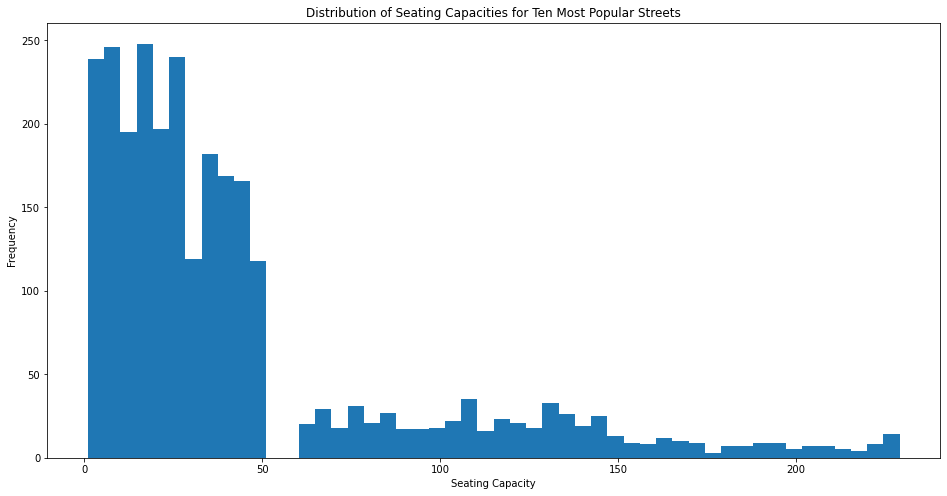

In [52]:
plt.figure(figsize=(16, 8))
plt.hist(data=popular_streets, x='number', bins=(50))
plt.title('Distribution of Seating Capacities for Ten Most Popular Streets')
plt.ylabel('Frequency')
plt.xlabel('Seating Capacity')
plt.show()

Most establishments located on popular streets have within 50 seats. There is a minority with a fairly even distribution from about 60 to well over 200 seats.

Since we are primarily interested in chain cafes and fast food restaurants, let's look at the distribution for these type specifically. First, we will make the appropriate slice from popular_streets.

In [53]:
cafe_fast_food_popular_streets = popular_streets.loc[((popular_streets.loc[:,'object_type'] == 'Cafe') |
                                       (popular_streets.loc[:,'object_type'] == 'Fast Food')) &
                                                     (popular_streets.loc[:,'chain'] == True)]
cafe_fast_food_popular_streets.head()

,id,object_name,address,chain,object_type,number,street_name
150,11936,PANDA EXPRESS #1212,5543 W SUNSET BLVD,True,Fast Food,45,W SUNSET BLVD
156,11942,ANDANTE COFFEE ROASTERS,2201 W SUNSET BLVD,True,Cafe,4,W SUNSET BLVD
182,11968,SUBWAY #1763,3959 WILSHIRE BLVD STE B-7,True,Fast Food,17,WILSHIRE BLVD
239,12025,DOWNTOWN FATBURGER,888 S FIGUEROA ST,True,Fast Food,15,S FIGUEROA ST
255,12041,SUBWAY,1205 W 3RD ST,True,Fast Food,14,W 3RD ST


Now let's plot the bar graph.

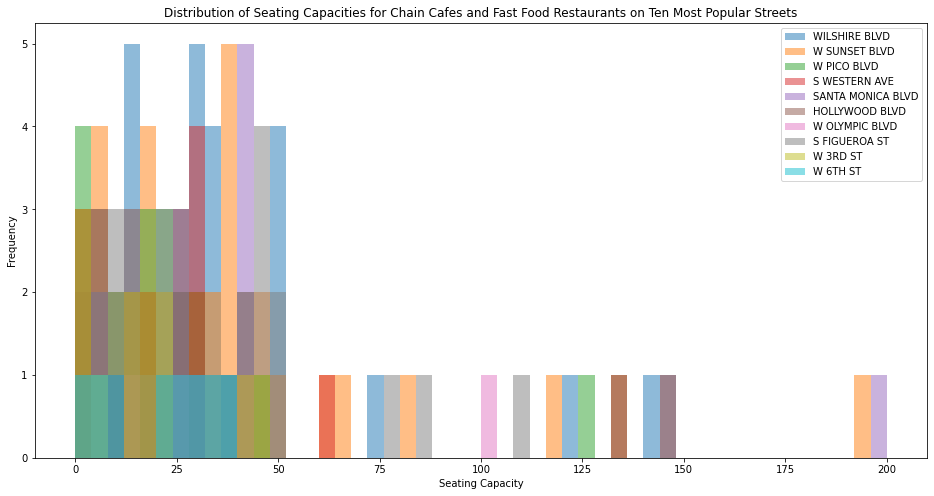

In [54]:
plt.figure(figsize=(16, 8))

plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'WILSHIRE BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'W SUNSET BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'W PICO BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'S WESTERN AVE'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'SANTA MONICA BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'HOLLYWOOD BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'W OLYMPIC BLVD'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'S FIGUEROA ST'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'W 3RD ST'], x='number', bins=(50), alpha=0.5, range=[0, 200])
plt.hist(data=cafe_fast_food_popular_streets.loc[cafe_fast_food_popular_streets.loc[:,'street_name'] ==
                                            'W 6TH ST'], x='number', bins=(50), alpha=0.5, range=[0, 200])

plt.title('Distribution of Seating Capacities for Chain Cafes and Fast Food Restaurants on Ten Most Popular Streets')
plt.ylabel('Frequency')
plt.xlabel('Seating Capacity')
plt.legend(labels=['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD', 'S WESTERN AVE', 'SANTA MONICA BLVD',
                  'HOLLYWOOD BLVD', 'W OLYMPIC BLVD', 'S FIGUEROA ST', 'W 3RD ST', 'W 6TH ST'])
plt.show()

For chain cafes and fast food restaurants on popular streets, seating capacity peaks around 25 and drops sharply after.

### Data analysis Summary

Successful automated cafes will most likely imitate existing cafes and fast food establishments.

Existing cafes and fast food establishments have greater market proportions as chains when compared to other chains (they typically fair better as chains compared to other establishment types).

Existing establishments predominately succeed on a small number of popular streets.

Cafes and fast food chains with multiple locations (preferable for capitalization on high initial investment and low long term overhead) typically fall within a seating capacity of 20 to 40 seats.

For the ten busiest streets, the seating capacity for relevant establishments peaks at 25 seats and drops sharply after.

Successful automated cafes will most likely be chains, located on the most popular streets, with a seating capacity of around 25 or less seats.

Presentation: <https://drive.google.com/file/d/1iVsZncXsHqIsbnfHjK9aiHwfhJQmitjU/view?usp=sharing> 